In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

In [27]:
df = pd.read_csv("mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [4]:
# Extract the first eleven columns
segmentation_vars = df.iloc[:, 0:11]
print(segmentation_vars)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting  
0         No         No  
1         No         No  
2        Yes         

In [5]:
# Convert "Yes" entries to numeric values (1 for Yes, 0 otherwise)
numeric_matrix = segmentation_vars.applymap(lambda x: 1 if x == "Yes" else 0)
print(numeric_matrix)


      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2     

In [6]:
# Check average value of each transformed segmentation variable
average_values = numeric_matrix.mean()
print(average_values)

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64


In [7]:
# Check value counts to verify transformation
value_counts = numeric_matrix.apply(pd.Series.value_counts)
print(value_counts)

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0    650         134   1317        193     688   145    583    517        933   
1    803        1319    136       1260     765  1308    870    936        520   

   healthy  disgusting  
0     1164        1100  
1      289         353  


In [8]:
# Calculate percentage value counts for each column
percentage_counts = numeric_matrix.apply(lambda x: x.value_counts(normalize=True) * 100)

# Print the percentage value counts
print(percentage_counts)

       yummy  convenient      spicy  fattening    greasy       fast  \
0  44.735031    9.222299  90.640055  13.282863  47.35031   9.979353   
1  55.264969   90.777701   9.359945  86.717137  52.64969  90.020647   

       cheap      tasty  expensive    healthy  disgusting  
0  40.123882  35.581555  64.211975  80.110117   75.705437  
1  59.876118  64.418445  35.788025  19.889883   24.294563  


Explained variance ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative explained variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]
Standard deviations of principal components: [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]


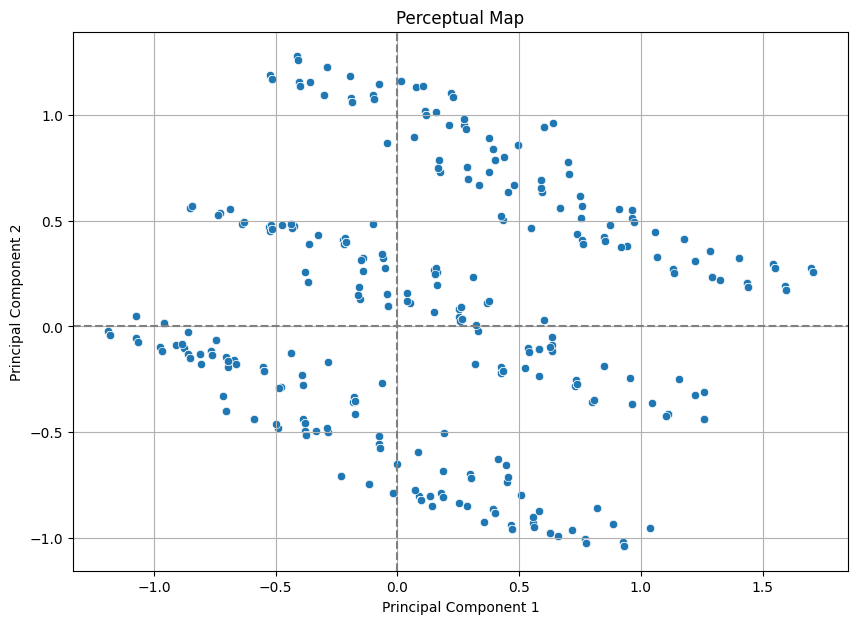

In [9]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(numeric_matrix)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())

# Calculate the standard deviations of the principal components
std_devs = pca.singular_values_ / (len(numeric_matrix) - 1) ** 0.5
print("Standard deviations of principal components:", std_devs)

# Create a DataFrame with the principal components
MD_pca_df = pd.DataFrame(data=MD_pca, columns=[f'PC{i+1}' for i in range(MD_pca.shape[1])])

# Visualize the first two principal components in a perceptual map
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=MD_pca_df)
plt.title('Perceptual Map')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

In [10]:
print("\nImportance of Components:")
print(MD_pca_df)


Importance of Components:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.425367 -0.219079  0.663255 -0.401300  0.201705 -0.389767 -0.211982   
1    -0.218638  0.388190 -0.730827 -0.094724  0.044669 -0.086596 -0.095877   
2     0.375415  0.730435 -0.122040  0.692262  0.839643 -0.687406  0.583112   
3    -0.172926 -0.352752 -0.843795  0.206998 -0.681415 -0.036133 -0.054284   
4     0.187057 -0.807610  0.028537  0.548332  0.854074 -0.097305 -0.457043   
...        ...       ...       ...       ...       ...       ...       ...   
1448  1.550242  0.275031 -0.013737  0.200604 -0.145063  0.306575 -0.075308   
1449 -0.957339  0.014308  0.303843  0.444350 -0.133690  0.381804 -0.326432   
1450 -0.185894  1.062662  0.220857 -0.467643 -0.187757 -0.192703 -0.091597   
1451 -1.182064 -0.038570  0.561561  0.701126  0.047645  0.193687 -0.027335   
1452  1.550242  0.275031 -0.013737  0.200604 -0.145063  0.306575 -0.075308   

           PC8       PC9      PC10  

- The standard deviations of the principal components indicate the amount of variance each principal component explains. Higher standard deviations correspond to components that explain more variance.

In [11]:
# Calculate the standard deviations of the principal components
std_devs = pca.singular_values_ / np.sqrt(len(numeric_matrix) - 1)
print("Standard deviations (1, .., p=11):")
print(np.round(std_devs, 1))


Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [12]:
# Get factor loadings (principal axes in feature space)
factor_loadings = pca.components_
print("Factor loadings:")
print(np.round(factor_loadings, 1))

Factor loadings:
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


- Factor loadings are the coefficients that represent the contribution of each original variable to the principal components.
- Mathematically, the factor loadings are the elements of the eigenvectors of the covariance matrix of the data.
- High absolute values of factor loadings indicate that the corresponding original variable has a strong influence on the principal component.
- Positive values suggest a positive relationship, while negative values suggest an inverse relationship.

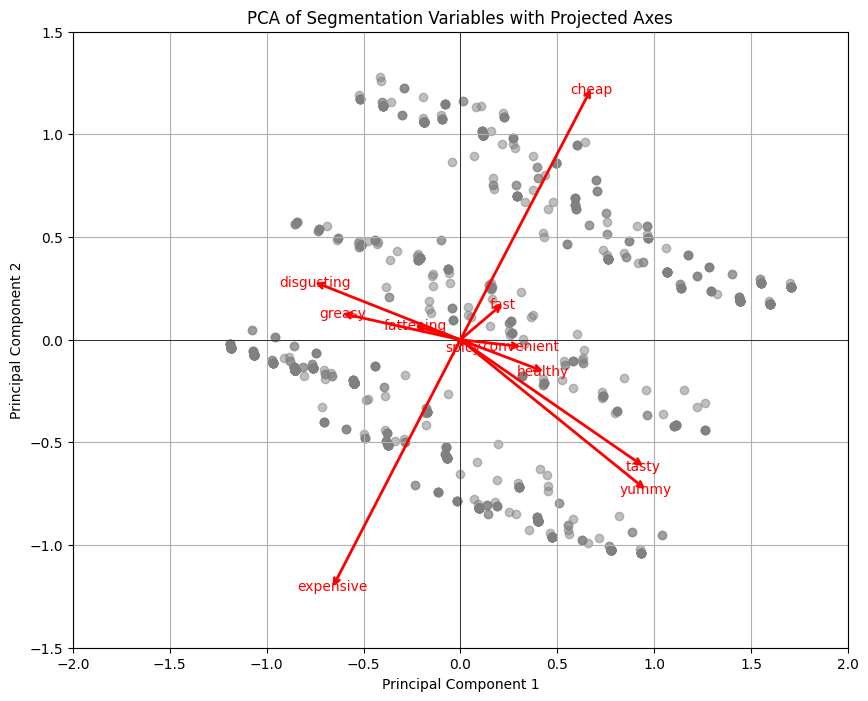

In [13]:
# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(numeric_matrix)

# Plotting the consumers
plt.figure(figsize=(10, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)

# Projecting the original segmentation variables as arrows
# These are the principal component vectors
components = pca.components_.T

# Create a function to draw arrows
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, color='red', shrinkA=0, shrinkB=0)
    ax.annotate('', xy=v1, xytext=v0, arrowprops=arrowprops)

# Plot each vector
origin = np.zeros(2)
for component, varname in zip(components, numeric_matrix.columns):
    draw_vector(origin, component * -2)  # Scale the component vectors for better visibility
    plt.text(component[0] * -2, component[1] *- 2, varname, color='red', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Segmentation Variables with Projected Axes')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)  # Adjust these limits as necessary
plt.ylim(-1.5, 1.5)  # Adjust these limits as necessary
plt.show()

### In this figure
- The attributes CHEAP and EXPENSIVE play a key role in the evaluation of McDonald’s, and these two attributes are assessed quite independently of the others.

- The remaining attributes align with what can be interpreted as positive versus negative perceptions: FATTENING, DISGUSTING and GREASY point in the same direction in the perceptual chart, indicating that respondents who view McDonald’s as FATTENING, DISGUSTING are also likely to view it as GREASY.
- The observations along the EXPENSIVE versus CHEAP axis cluster around three values: a group of consumers at the top around the arrow pointing to CHEAP, a group of respondents at the bottom around the arrow pointing to EXPENSIVE, and a group of respondents in the middle.

### Step 5: Extracting Segments
- k-means analysis.
- finite mixtures of binary distributions.
- finite mixtures of regressions

### 5.1 Using k-Means

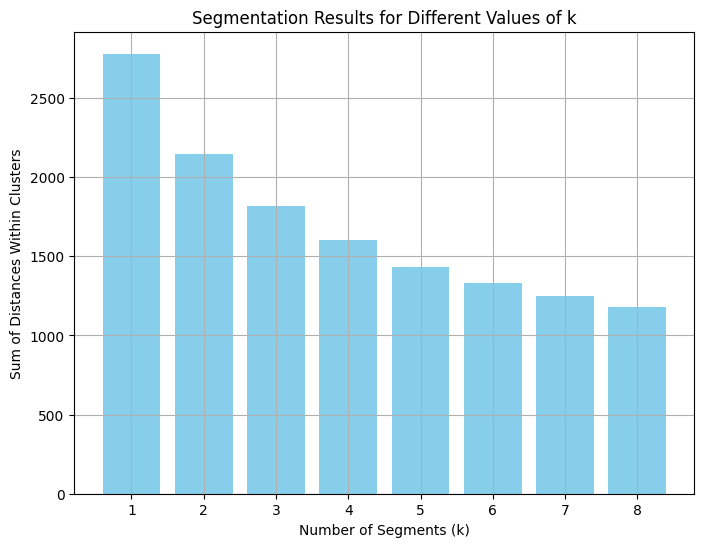

In [14]:

MD_x = numeric_matrix

np.random.seed(1234)


nrep = 10
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

# Perform K-means clustering for each number of segments
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append(kmeans.inertia_)  # Sum of squared distances within clusters
    MD_km28[str(k)] = kmeans

# Plotting the sum of distances within clusters for each number of segments
plt.figure(figsize=(8, 6))
plt.bar(num_segments, within_cluster_distances, color='skyblue')
plt.xlabel("Number of Segments (k)")
plt.ylabel("Sum of Distances Within Clusters")
plt.title("Segmentation Results for Different Values of k")
plt.xticks(num_segments)
plt.grid(True)
plt.show()

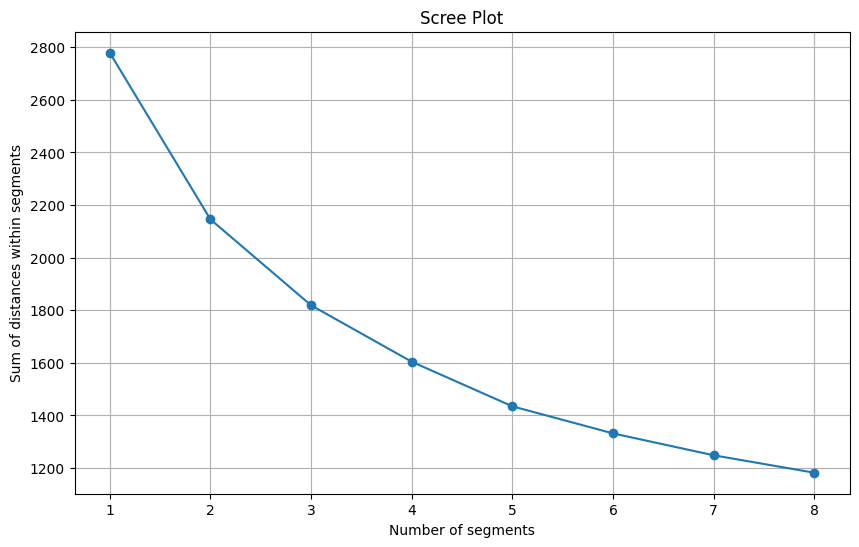

In [15]:


# Function to perform k-means with multiple restarts
def kmeans_multiple_restarts(data, num_clusters, n_init=10):
    kmeans = KMeans(n_clusters=num_clusters, n_init=n_init, random_state=1234)
    return kmeans.fit(data)

# Performing k-means for 2 to 8 clusters
results = {}
for k in range(1, 9):
    results[k] = kmeans_multiple_restarts(MD_x, k)

# Scree plot
sum_of_distances = [result.inertia_ for result in results.values()]
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), sum_of_distances, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Sum of distances within segments')
plt.title('Scree Plot')
plt.grid(True)
plt.show()



### Scree Plot analysis
- A scree plot is used to determine the optimal number of segments by plotting the sum of distances within segments against the number of segments.
- No distinct elbow in the scree plot suggests that the sum of distances decreases slowly with more segments.
- Here the sum of distances drops dramatically is not visible. This scree plot does not provide useful guidance on the number of market segments to extract.

### Stability based analysis
- A second approach to determining a good number of segments is to use
stability-based data structure analysis.
- Stability-based data structure analysis helps determine whether market segments naturally exist within the data or if they need to be artificially constructed.
- Stability-based data structure analysis also indicates whether market segments occur naturally in the data, or if they have to be artificially constructed.

In [ ]:

# Simulate some data (MD.x)
np.random.seed(1234)


num_segments = range(2, 9)
nrep = 10
nboot = 100

# Function to perform stability analysis
def stability_analysis(data, num_segments, nrep, nboot):
    stability_results = {k: [] for k in num_segments}

    for k in num_segments:
        for _ in range(nboot):
            # Generate a bootstrap sample
            data_bootstrap = resample(data)
            labels_list = []

            for _ in range(nrep):
                kmeans = KMeans(n_clusters=k, n_init=10, random_state=None)
                labels = kmeans.fit_predict(data_bootstrap)
                labels_list.append(labels)

            # Calculate adjusted Rand index for each pair of replicates
            for i in range(nrep):
                for j in range(i + 1, nrep):
                    ari = adjusted_rand_score(labels_list[i], labels_list[j])
                    stability_results[k].append(ari)

    return stability_results

# Perform stability analysis
stability_results = stability_analysis(MD_x, num_segments, nrep, nboot)


In [ ]:
# Convert results to a format suitable for seaborn
data_to_plot = []
for k in stability_results:
    for score in stability_results[k]:
        data_to_plot.append((k, score))

# Convert to a DataFrame
df = pd.DataFrame(data_to_plot, columns=["Number of Segments", "Adjusted Rand Index"])

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x="Number of Segments", y="Adjusted Rand Index", data=df)
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Global Stability Analysis")
plt.grid(True)

plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()


### Interpreting Results:
- The boxplots provide a visual representation of stability for different numbers of segments.
- Higher stability (indicated by the median stability score and less variability in the boxplots) is preferable.



### Interpreting Results:
- Look for the number of segments with a high median ARI and a low IQR.
- The combination of a high median and low IQR indicates a stable and reliable segmentation.

### Thus the four segment solution emerges as the solution containing the most market segments

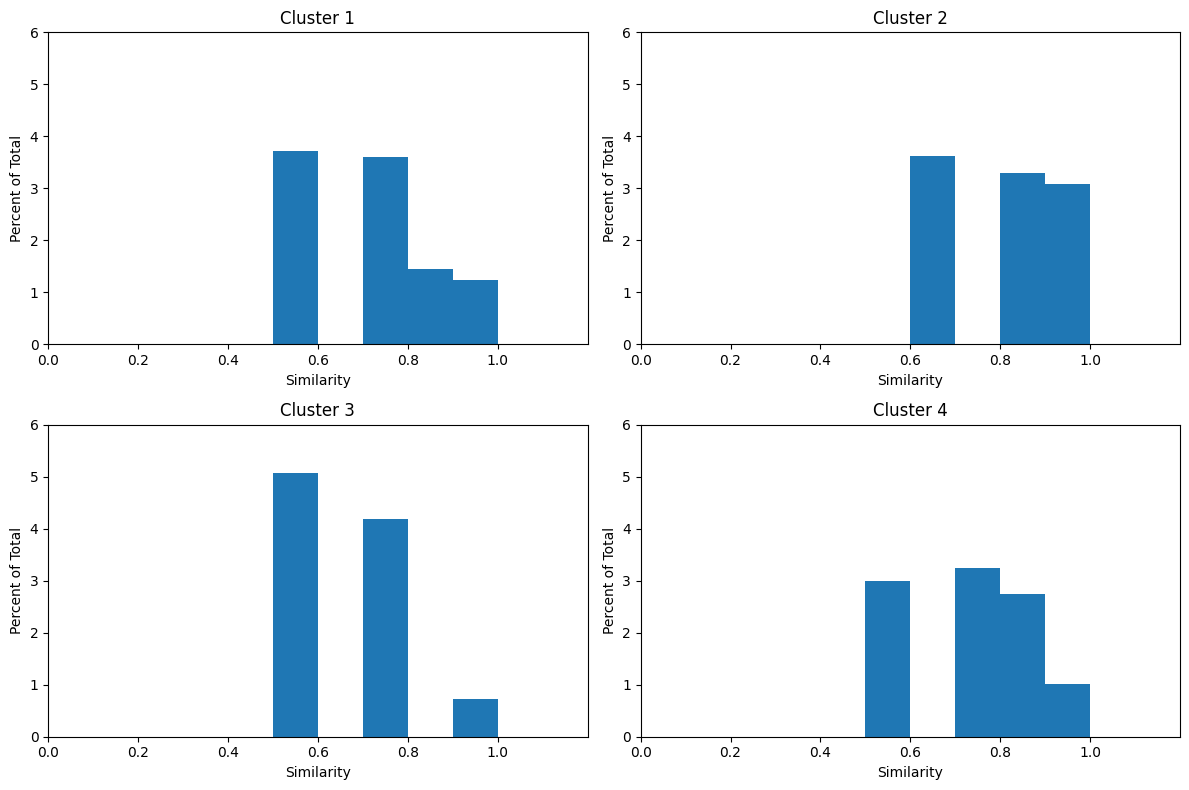

In [16]:
# Simulate some data (MD_x)
np.random.seed(1234)
#MD_x = np.random.rand(100, 5)  # Assuming 100 samples and 5 features

# Perform KMeans clustering for 4 segments
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(MD_x)
cluster_centers = kmeans.cluster_centers_

# Calculate similarities (distances to the cluster centers)
similarities = np.min(kmeans.transform(MD_x), axis=1)

# Convert similarities to DataFrame for easy plotting
df = pd.DataFrame({'Similarity': similarities, 'Cluster': labels})

# Plot histogram for each cluster
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flatten()):
    cluster_data = df[df['Cluster'] == i]
    ax.hist(cluster_data['Similarity'], bins=10, range=(0, 1), density=True)
    ax.set_xlabel('Similarity')
    ax.set_ylabel('Percent of Total')
    ax.set_title(f'Cluster {i + 1}')
    ax.set_xlim(0, 1.2)
    ax.set_ylim(0, 6)
    ax.set_xticks(np.linspace(0, 1, 6))

plt.tight_layout()
plt.show()

- None of the segments shown in figure is well separated from the other segments, and proximity to at least one other segment is present as indicated by the similarity values all being between 0.5 and 1.0.

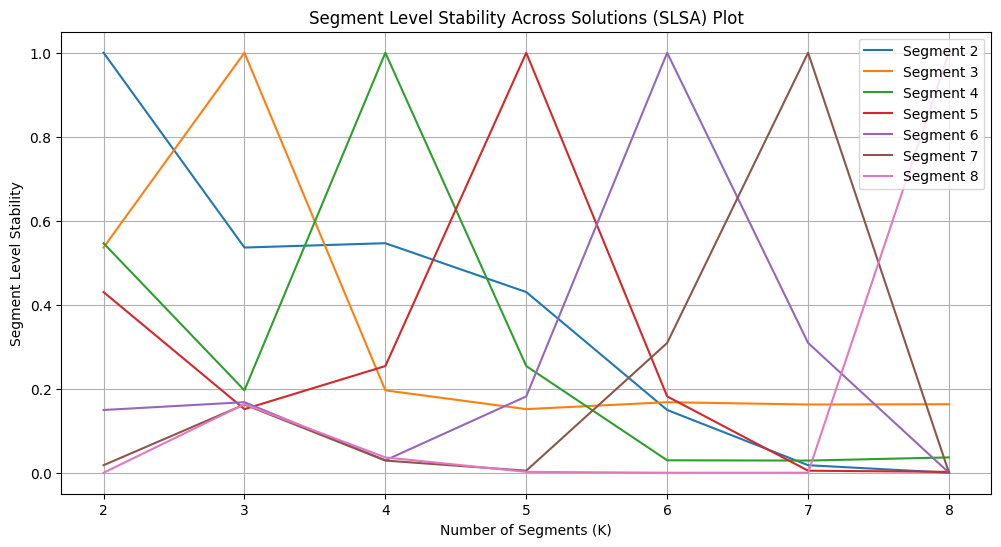

In [17]:

# SLSA plot
num_segments = range(2, 9)

# Initialize a list to store stability metrics for each segment
segment_stability = []

# Calculate stability metrics for each segment and each K
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

# Plot SLSA plot
plt.figure(figsize=(12, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], label=f'Segment {segment}')

plt.xlabel('Number of Segments (K)')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()


### Graph analysis:
- Identify the K value where the mean stability curve peaks or reaches a plateau.
- From here segment number 4 is stable segmentation

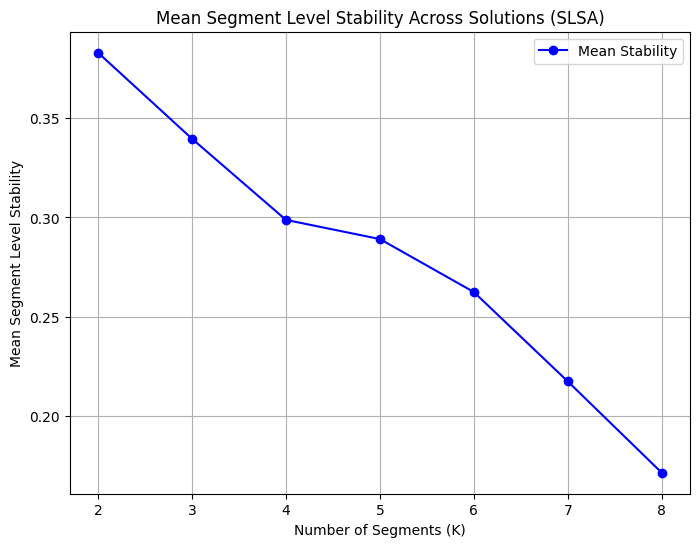

In [18]:


# Calculate mean stability for each segment across different K values
mean_stability = []
for i, segment in enumerate(range(2, 9)):
    stability_scores = [np.mean(segment_stability[i] == labels) for labels in segment_stability]
    mean_stability.append(np.mean(stability_scores))

# Plot mean stability
plt.figure(figsize=(8, 6))
plt.plot(num_segments, mean_stability, marker='o', linestyle='-', color='b', label='Mean Stability')

plt.xlabel('Number of Segments (K)')
plt.ylabel('Mean Segment Level Stability')
plt.title('Mean Segment Level Stability Across Solutions (SLSA)')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()


In [19]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

segment_labels

{'2': array([1, 0, 0, ..., 0, 0, 1], dtype=int32),
 '3': array([1, 0, 0, ..., 0, 2, 1], dtype=int32),
 '4': array([1, 3, 3, ..., 3, 0, 2], dtype=int32),
 '5': array([2, 3, 4, ..., 4, 0, 1], dtype=int32)}

In [20]:
segment_similarities

{'2': array([1.18700649, 1.03060963, 1.83763118, ..., 1.12682984, 1.27986291,
        1.28015113]),
 '3': array([1.18819649, 1.05436747, 1.50713439, ..., 0.7453038 , 1.14333643,
        1.31518757]),
 '4': array([1.24128843, 1.12309822, 1.60643292, ..., 0.64651073, 1.09194857,
        0.92824488]),
 '5': array([1.23242931, 0.96719367, 1.57883931, ..., 0.61881309, 0.97175595,
        0.92328464])}

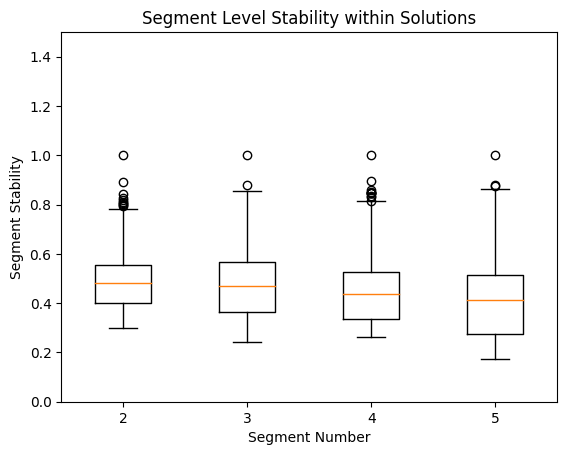

In [21]:
# SLSW using boxplot
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1.5)
plt.title("Segment Level Stability within Solutions")

plt.show()

### Insight into Stability Across Solutions:

- By comparing the distribution of stability values across different K values, the plot helps assess which segment solutions exhibit more consistent (narrower and less variable box plots) or less consistent (wider and more variable box plots) segment memberships.
- This analysis aids in selecting the most stable segment solution (K) or understanding how stability varies across different segmentation approaches.

## Mixture model and summary

In [22]:
# mixing models
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


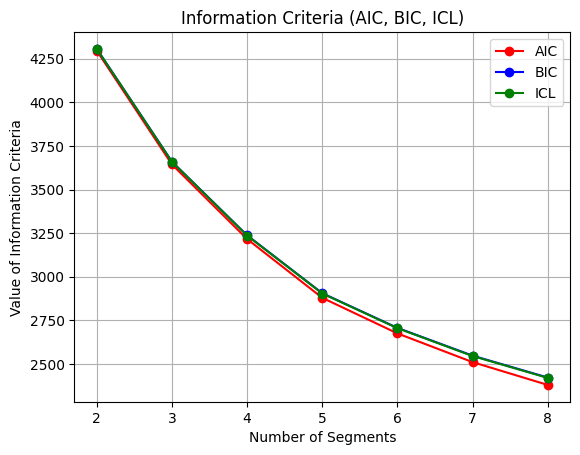

In [23]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC',color='red')
plt.plot(num_segments, BIC_values, marker='o', label='BIC',color='blue')
plt.plot(num_segments, ICL_values, marker='o', label='ICL',color='green')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


In [28]:
reversed_table = df['Like'].value_counts().sort_index(ascending=False)

print("Reversed table:")
print(reversed_table)

Reversed table:
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [29]:
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)
df['Like.n'] = 6 - df['Like.n']

like_n_counts = df['Like.n'].value_counts().sort_index()

print(like_n_counts)

Like.n
1     143
2     160
3     229
4     187
5     152
6     169
7      58
8      59
9      73
10     71
11    152
Name: count, dtype: int64


In [30]:
from patsy import dmatrices

independent_vars = df.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [31]:
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose = False)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


## Profiling Segmennts

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 13.820274961085254, 13.820274961085254, 0.0],
  [0.0, 16.837294569763987, 16.837294569763987, 13.820274961085254],
  [0.0, 23.67244402390833, 23.67244402390833, 16.837294569763987],
  [15.132745950421556,
   24.097479054882314,
   24.097479054882314,
   23.67244402390833],
  [0.0, 18.303005217723125, 18.303005217723125, 0.0],
  [0.0, 22.260923119338788, 22.260923119338788, 18.303005217723125],
  [0.0, 23.646302388396077, 23.646302388396077, 22.260923119338788],
  [0.0, 26.301594692930717, 26.301594692930717, 23.646302388396077],
  [24.097479054882314,
   30.24915897946193,
   30.24915897946193,
   26.301594692930717

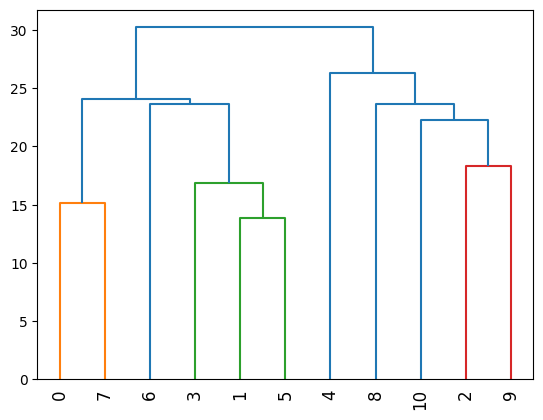

In [32]:
# heirarchial clustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

D = np.transpose(MD_x)
D = linkage(D, method = "average")
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

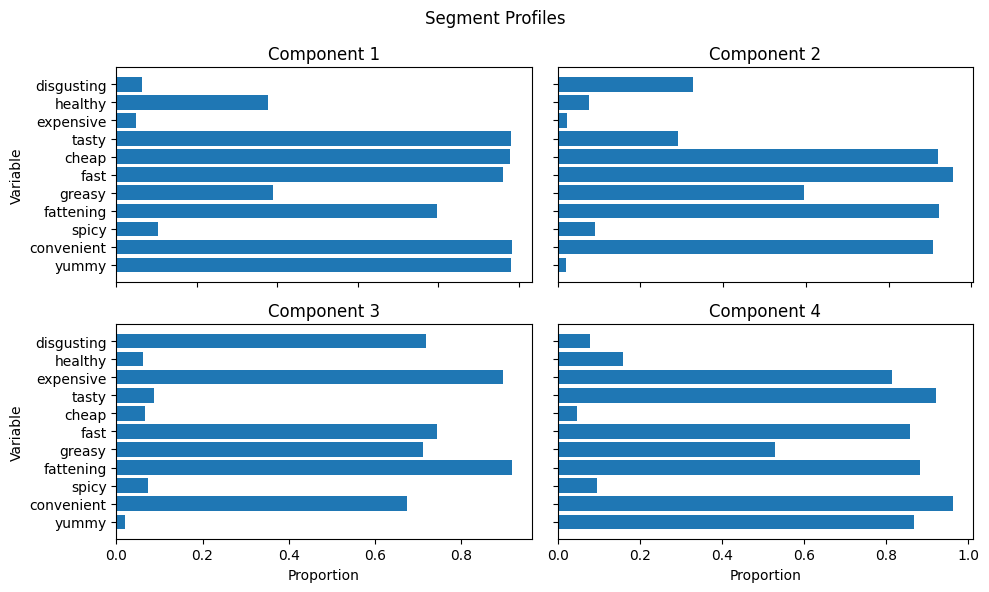

In [33]:
kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

NameError: name 'rotations' is not defined

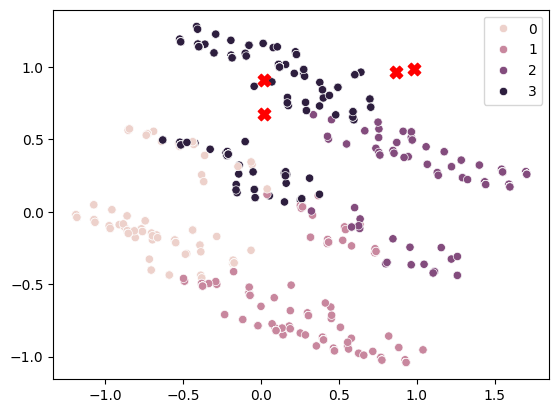

In [34]:
# showing the cluster solution
sns.scatterplot(data=df,x=MD_pca[:, 0], y=MD_pca[:, 1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")

def plot_proj_axes(rotations, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rotations[i, 0]*2, rotations[i, 1]*2, color='g', alpha=0.5)
        plt.text(rotations[i, 0]*2.2, rotations[i, 1]*2.2, label, color='g', ha='center', va='center')

feature_names = df.columns[:11]
plot_proj_axes(rotations[:, :2], feature_names)

plt.legend()
plt.grid(True)
plt.show()

In [36]:
# segment description
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder

df1=pd.read_csv("mcdonalds.csv")

def labelling(x):
    df1[x] = LabelEncoder().fit_transform(df1[x])
    return df1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df_eleven = df1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df1['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(df1['cluster_num'],df1['Like'])
df1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,1


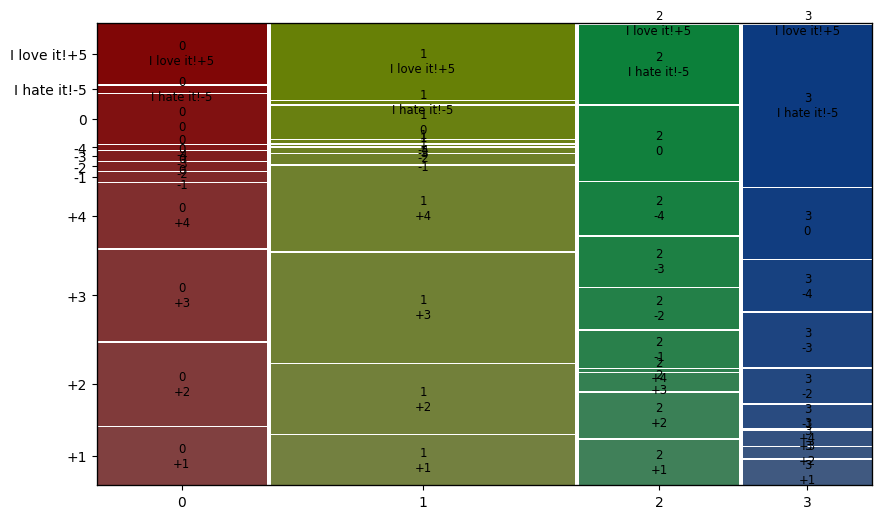

In [37]:
plt.rcParams['figure.figsize'] = (10,6)
mosaic(crosstab.stack())
plt.show()

In [38]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct

Gender,Female,Male
row_0,,
0,309,204
1,213,153
2,101,141
3,165,167


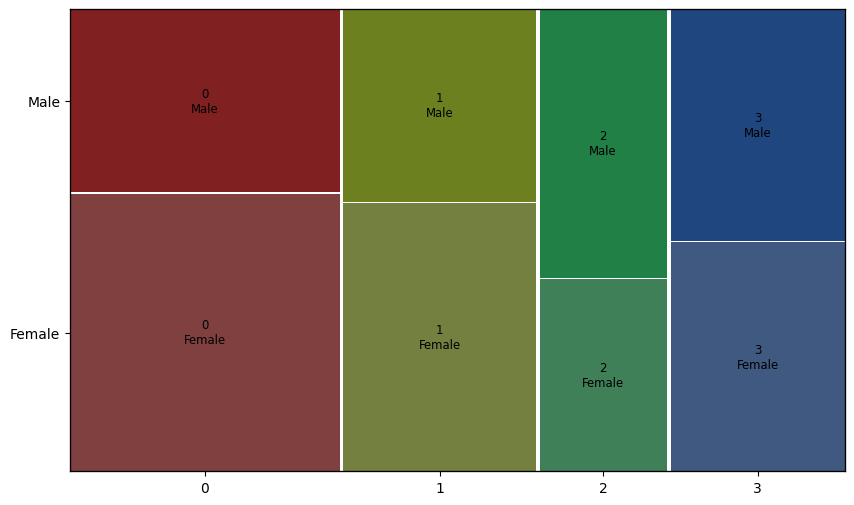

In [39]:
mosaic(ct.stack(),gap=0.005)
plt.show()

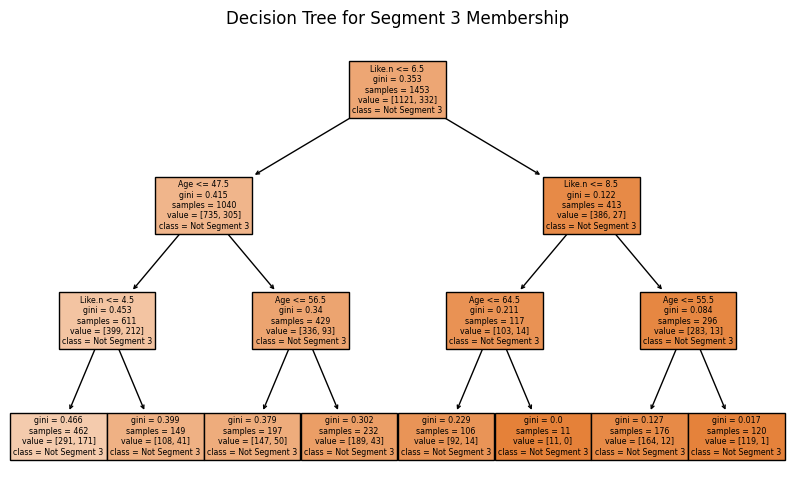

In [40]:
# membership plot
from sklearn.tree import DecisionTreeClassifier, plot_tree


X = df[['Like.n', 'Age']]
y = (k4==3).astype(int)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.title("Decision Tree for Segment 3 Membership")
plt.show()

# Selecting Target Segment

In [45]:
df1['VisitFrequency'] = LabelEncoder().fit_transform(df1['VisitFrequency'])
visit = df1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [48]:
df1['Like'] = LabelEncoder().fit_transform(df1['Like'])
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [47]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


In [44]:
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


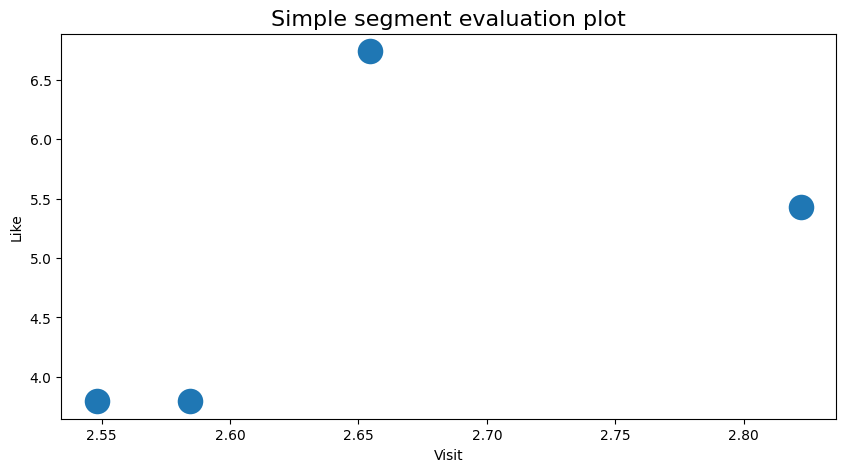

In [49]:
# segment evalutaion
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400)
plt.title("Simple segment evaluation plot",
          fontsize = 16)
plt.xlabel("Visit", fontsize = 10)
plt.ylabel("Like", fontsize = 10)
plt.show()

## Team members
GitHub -> Sovan kumar Das
https://github.com/kumar-sovan/Feynn-Labs-Internship-project.git

GitHub -> Devendra Kumar Danodia
https://github.com/dev001906/Feynn-Labs-internship-project.git

GitHub -> Aman
https://github.com/amansaini49393/Feynn_Labs_internship_project2.git